In [29]:
import sys
sys.executable
#Copy below path and paste to the 2nd cell

'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python310\\python.exe'

In [30]:
#Paste after '!'
!C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python310\\python.exe -m pip install scikit-learn statsmodels sklearn

     ---------------------------------------- 9.2/9.2 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 3.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd 
import math
import matplotlib as plt 
import numpy as np

In [32]:
wage= pd.read_excel('wage.xlsx')

In [33]:
wage['exper']

0       16
1        9
2       16
3       10
4       16
        ..
3005     7
3006    15
3007     6
3008    13
3009     7
Name: exper, Length: 3010, dtype: int64

In [34]:
import numpy as np
import pandas as pd

id = 450
np.random.seed(id)
yourdata = wage.sample(n=30)



In [35]:
yourdata['nearc4'].tail(30)

472     1
1178    1
2969    0
2809    0
236     1
659     1
2820    0
411     1
1027    0
1064    0
2305    1
717     1
2091    1
2839    0
2163    1
2161    1
977     1
1917    1
1210    0
1314    0
2162    1
843     1
2685    0
2534    0
122     1
339     1
1820    0
1710    1
908     1
234     1
Name: nearc4, dtype: int64

In [36]:
#Q1 Bài toán sử dụng phân phối nhị thức.
def countBlack(x):
    count = 0
    for i in range(len(x)):
        if x[i]==1:
            count += 1
    return count
x= wage['black'].values

blackMan= countBlack(x)

P= blackMan/len(wage)





rs=math.comb(blackMan,6)*math.comb(3010-blackMan,24)/math.comb(3010,30)
print(rs*100,'%')

16.332227201348502 %


In [37]:
#Q2
def countWhite(y):
    count=0
    for i in range(len(y)):
        if y[i]==0:
            count +=1
    return count
y= yourdata['black'].values
whiteMan= countWhite(y)
blackMan=30-whiteMan


def caculate(y1):
    fullWhiteMan=1
    sums=1
    rs=0

    for i in range(5):
        fullWhiteMan*=(30-blackMan-i)

    for ii in range(5):
        sums*=30-ii
    rs=1- fullWhiteMan/sums
    return rs

y1= yourdata['black'].values
rsy= caculate(y1)
print('xác xuất để chọn ra 5 người có ít nhất 1 người da đen là : ',rsy*100,'%')
    






xác xuất để chọn ra 5 người có ít nhất 1 người da đen là :  81.52077807250221 %


In [38]:
#Q3
#a
rsEblackMan= P*30
print('Expect values black man is : ',rsEblackMan)
#b
print('Numbers of blackman  in sample is: ',blackMan)

Expect values black man is :  7.0066445182724255
Numbers of blackman  in sample is:  8


In [39]:
#Q4 # Phân phối poisson / choose a person, what is the probability that he/she has 6 years in education?
meanEduc = yourdata['educ'].mean()

rs=(math.e**-meanEduc) * meanEduc**6 / math.factorial(6)
print(rs*100,'%')




    




1.0307575022150077 %


age's mean of wage:  28.119601328903656
age's var of wage:  9.837522764649398
age's mean of yourdata:  28.266666666666666
age's mean of yourdata:  8.395555555555557


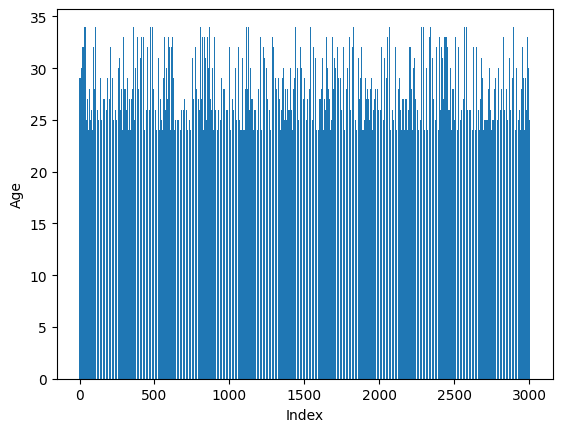

In [40]:
#Q5  Create the bar chart for age. Is age a uniform distribution?
meanAge= np.mean(wage['age'])
varAge=np.var(wage['age'])
YmeanAge= np.mean(yourdata['age'])
YvarAge=np.var(yourdata['age'])
print("age's mean of wage: ",meanAge)
print("age's var of wage: ",varAge)
print("age's mean of yourdata: ",YmeanAge)
print("age's mean of yourdata: ",YvarAge)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
x=wage['age']
def visualize_age(x):
    # Tạo biểu đồ bar chart
    plt.bar( wage.index,x)
    # Đặt tên cho trục x và trục y
    plt.xlabel('Index')
    plt.ylabel('Age')
    # Hiển thị biểu đồ
    plt.show()
visualize_age(x)


In [41]:
#6. Suppose that lwage is a normally distributed random variable with mean μ = 6.26 and standard deviation σ = 0.44. Find the probability P(5 < lwage < 6).
import scipy.stats as stats

# Define the mean and standard deviation of lwage
mu = 6.26
sigma = 0.44

# Calculate the z-scores for 5 and 6
z1 = (5 - mu) / sigma
z2 = (6 - mu) / sigma

# Use the cumulative distribution function to calculate the probability
prob = stats.norm.cdf(z2) - stats.norm.cdf(z1)

print("The probability P(5 < lwage < 6) is: {:.4f}".format(prob))


The probability P(5 < lwage < 6) is: 0.2752


In [42]:
#Q7
#a
IQclear= yourdata['IQ'].dropna()
n=20
meanIQ= np.mean(IQclear)
varIQ= np.var(IQclear)


z1= (100- meanIQ) /(math.sqrt(varIQ)/math.sqrt(n))
z2= (110- meanIQ) /(math.sqrt(varIQ)/math.sqrt(n))


prob = stats.norm.cdf(z2) - stats.norm.cdf(z1)

print("The probability P(100 < IQ < 110) is: {:.4f}".format(prob))



#b
n= varIQ/1
print('n is: ',round(n))











The probability P(100 < IQ < 110) is: 0.7779
n is:  299


In [43]:
#Q8 .	Calculate the statistics for wage, IQ, educ and exper.
# Import the statistics module
import statistics

# Calculate the mean
mean = statistics.mean(wage["wage"])
print(f"The wage's  mean is {mean}")

# Calculate the median
median = statistics.median(wage["wage"])
print(f"The wage's median is {median}")

# Calculate the mode
mode = statistics.mode(wage["wage"])
print(f"The wage's mode is {mode}")

# Calculate the variance
variance = statistics.variance(wage["wage"])
print(f"The wage's variance is {variance}")

# Calculate the standard deviation
std_dev = statistics.stdev(wage["wage"])
print(f"The wage's standard deviation is {std_dev}")

print('='*20)
#========================================

IQclear= yourdata['IQ'].dropna()
meanIQ = statistics.mean(IQclear)
print(f"The IQ' mean is {meanIQ}")

# Calculate the median
IQmedian = statistics.median(IQclear)
print(f"The median is {IQmedian}")

# Calculate the mode
IQmode = statistics.mode(IQclear)
print(f"The IQ's mode is {IQmode}")

# Calculate the variance
IQvariance = statistics.variance(IQclear)
print(f"The  IQ variance is {IQvariance}")

# Calculate the standard deviation
IQstd_dev = statistics.stdev(IQclear)
print(f"The standard deviation is {IQstd_dev}")
print('='*20)
#==============================================
expermean = statistics.mean(wage["exper"])
print(f"The exper's mean is {expermean}")

# Calculate the median
expermedian = statistics.median(wage["exper"])
print(f"The exper's median is {expermedian}")

# Calculate the mode
expermode = statistics.mode(wage["exper"])
print(f"The exper's mode is {expermode}")

# Calculate the variance
expervariance = statistics.variance(wage["exper"])
print(f"The exper's variance is {expervariance}")

# Calculate the standard deviation
experstd_dev = statistics.stdev(wage["exper"])
print(f"The exper's standard deviation is {experstd_dev}")

print('='*20)

#=================================================
Educmean = statistics.mean(wage["educ"])
print(f"The educ's  mean is {Educmean}")

# Calculate the median
Educmedian = statistics.median(wage["educ"])
print(f"The Educ's median is {Educmedian}")

# Calculate the mode
Educmode = statistics.mode(wage["educ"])
print(f"The Educ's mode is {Educmode}")

# Calculate the variance
Educvariance = statistics.variance(wage["educ"])
print(f"The wage's variance is {Educvariance}")

# Calculate the standard deviation
Educstd_dev = statistics.stdev(wage["educ"])
print(f"The Educ's standard deviation is {Educstd_dev}")

print('='*20)

The wage's  mean is 577.2823920265781
The wage's median is 537.5
The wage's mode is 500
The wage's variance is 69147.06878257806
The wage's standard deviation is 262.95830236480094
The IQ' mean is 103.66666666666667
The median is 104.0
The IQ's mode is 104.0
The  IQ variance is 310.3076923076923
The standard deviation is 17.615552568900366
The exper's mean is 8.856146179401993
The exper's median is 8.0
The exper's mode is 6
The exper's variance is 17.153443434922256
The exper's standard deviation is 4.141671574970939
The educ's  mean is 13.263455149501661
The Educ's median is 13.0
The Educ's mode is 12
The wage's variance is 7.165862434843863
The Educ's standard deviation is 2.6769128552950434


In [44]:
#Q9 find Mean and variance of IQ
IQclear= yourdata['IQ'].dropna()
SampleIQ=np.mean(IQclear,axis=0)
print('Mean of IQ is :',SampleIQ)
sample_var = np.var(IQclear, ddof=1)
print("variance of IQ is : ", sample_var)

Mean of IQ is : 103.66666666666667
variance of IQ is :  310.3076923076923


In [45]:
#Q10 Suppose that lwage is a normally distributed random variable with standard deviation 
import scipy.stats as stats
sample=np.mean(yourdata['lwage'])
print('Mean of Iwage',sample)

# Sample mean and standard deviation of lwage
sample_mean=sample
sample_std = 0.44

# Calculate the standard error of the mean
std_error = sample_std / (len(yourdata['lwage']) ** 0.5)

# Calculate the 95% confidence interval
conf_int = stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

print("The 95% confidence interval for the true mean lwage is:", conf_int)


Mean of Iwage 6.354127295811971
The 95% confidence interval for the true mean lwage is: (6.196678211164862, 6.511576380459081)


In [46]:
#Q11

chanduoi= SampleIQ -2.06 *sample_var/math.sqrt(len(IQclear))
chantren=SampleIQ +2.06 *sample_var/math.sqrt(len(IQclear))

print("The 96% confidence interval for the true mean lwage is:", chanduoi,',',chantren)

The 96% confidence interval for the true mean lwage is: -19.353944384014312 , 226.68727771734765


In [47]:
#Q12
rs=(1.96*0.44/0.2)**2
print('sample size should be used is: ',round(rs))


sample size should be used is:  19


In [48]:
#Q13
from scipy.stats import norm

a = 0.01
z = norm.ppf(a/2)
#Hàm tính Z
print(z)






-2.575829303548901


In [49]:
#Q14
def countBlack(x):
    count = 0
    for i in range(len(x)):
        if x[i]==1:
            count += 1
    return count
x= yourdata['black'].values

blackMan= countBlack(x)

n = 30
x = blackMan
p = x / n  # proportion of black people in the sample

# calculate the variance using the formula for a binomial distribution
s2 = n * p * (1 - p) / (n - 1)


from scipy.stats import norm

a = 0.01
z = norm.ppf(a/2)
rs=((z/0.01)**2)*0.25
print('sample should be use is: ',round(rs))




sample should be use is:  16587


In [50]:

#Q15
z= (SampleIQ - 100)/15/math.sqrt(30)

Zalpha = norm.ppf(0.01)

if z > - Zalpha and z <  Zalpha:
    print('Reject')
else:
    print('no reject')



no reject


In [51]:
#16
import numpy as np
from scipy.stats import t

# đầu tiên, ta cần lấy mẫu con của lwage
lwage_subsample = wage['lwage']

# đặt giả thuyết H0 và H1
H0_mean = 6
H1_mean = 6
alpha = 0.1

# tính toán trung bình mẫu và độ lệch chuẩn mẫu
xbar = np.mean(lwage_subsample)
s = np.std(lwage_subsample, ddof=1)

# tính toán giá trị t-statistic
t_statistic = (xbar - H0_mean) / (s / np.sqrt(len(lwage_subsample)))

# tính toán giá trị t-critical (nếu muốn kiểm định hai đuôi)
t_critical = t.ppf(1-alpha, len(lwage_subsample)-1)


# In kết quả
print("t-statistic =", t_statistic)

print("t-critical =", t_critical)

# kiểm định giả thuyết
if t_statistic > t_critical:
    print("Reject the null hypothesis: mean(lwage) > 6")
else:
    print("Fail to reject the null hypothesis: mean(lwage) = 6")


t-statistic = 32.368373792247624
t-critical = 1.2818329794772596
Reject the null hypothesis: mean(lwage) > 6


In [52]:
#17
import math
num_less_than_10 = len(wage[wage['exper'] < 10])

# We have a sample of 3010 people, and that 1850 of them have less than 10 years of work experience.
p0 = 0.07
p_less_than_10 = len(wage[wage['exper'] < 10]) / 3010
p_less_than_10
# The formula for the test statistic is:
# z = (p̂ - p0) / sqrt(p0(1-p0) / n)
z = (p_less_than_10 - p0) / math.sqrt(p0 * (1 - p0) / 3010)
z 

117.10749649493572

In [53]:
#Q18
import math
num_less_than_10 = len(wage[wage['exper'] < 10])
print(num_less_than_10)
# We have a sample of 3010 people, and that 1850 of them have less than 10 years of work experience.
p0 = 0.07
p_less_than_10 = len(wage[wage['exper'] < 10]) / 3010
p_less_than_10
# The formula for the test statistic is:
# z = (p̂ - p0) / sqrt(p0(1-p0) / n)
z = (p_less_than_10 - p0) / math.sqrt(p0 * (1 - p0) / 3010)
z 
# Because alpha = 0.02 --> z = -2.33 and 2.33 but we see that z = 117.10749649493572 is much larger than 2.33 so we can
# conclude that the observed proportion is significantly different from p0 and provides evidence in support of an alternative hypothesis.


#a

# Separate the data into two groups: black and non-black
black = wage[wage['black'] == 1]['wage']
non_black = wage[wage['black'] == 0]['wage']

# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(black, non_black)

# Compare the p-value with the significance level (0.01)
if p_value < 0.01:
    print("There is a significant difference between the average wages of black and non-black individuals at a 1% significance level.")
else:
    print("There is no significant difference between the average wages of black and non-black individuals at a 1% significance level.")


#b
from statsmodels.stats.proportion import proportions_ztest

# Separate the data into two groups: black and non-black
black = wage[wage['black'] == 1]
non_black = wage[wage['black'] == 0]

# Calculate the number of successes (low IQ) and sample size for both groups
num_successes = [sum(black['IQ'] < 90), sum(non_black['IQ'] < 90)]
sample_sizes = [len(black), len(non_black)]

# Calculate the z-statistic and p-value
z_statistic, p_value = proportions_ztest(num_successes, sample_sizes)

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("There is a significant difference between the proportions of black and non-black individuals with low IQ at a 5% significance level.")
else:
    print("There is no significant difference between the proportions of black and non-black individuals with low IQ at a 5% significance level.")


#c



1850
There is a significant difference between the average wages of black and non-black individuals at a 1% significance level.
There is a significant difference between the proportions of black and non-black individuals with low IQ at a 5% significance level.


In [54]:
#19
import statsmodels.api as sm
X = yourdata['educ']
y = yourdata['wage']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
#a
print("Slope: ", model.params[1])
print("Intercept: ", model.params[0])
#b
if model.pvalues[0] < 0.1:
    print("Regression is significant at 10% level")
else:
    print("Regression is not significant at 10% level")
#c
SSE = np.sum(model.resid ** 2)
SST = np.sum((y - np.mean(y)) ** 2)
R2 = 1 - SSE / SST
print("R-squared: ", R2)
#d
import statsmodels.api as sm


model = sm.OLS(y, X).fit()

k = 1
n = len(y)
RSS = model.ssr
SSE = model.ssr / (n - k - 1)

F = (RSS / k) / (SSE / (n - k - 1))
p_value = 1 - stats.f.cdf(F, dfn=k, dfd=n-k-1)

if p_value < 0.1:
    print("Reject null hypothesis: The regression is significant at the 10% level.")
else:
    print("Fail to reject null hypothesis: The regression is not significant at the 10% level.")



Slope:  24.84546084546084
Intercept:  272.08385308385317
Regression is not significant at 10% level
R-squared:  0.07538922365467371
Reject null hypothesis: The regression is significant at the 10% level.


In [55]:
#20
import statsmodels.api as sm

# Chọn biến độc lập và biến phụ thuộc
X = yourdata['educ']
y = yourdata['lwage']

# Thêm một intercept vào mô hình
X = sm.add_constant(X)

# Tạo mô hình hồi quy tuyến tính và fit dữ liệu vào mô hình
model = sm.OLS(y, X).fit()

# In kết quả
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3.024
Date:                Sun, 16 Jul 2023   Prob (F-statistic):             0.0930
Time:                        14:51:13   Log-Likelihood:                -11.798
No. Observations:                  30   AIC:                             27.60
Df Residuals:                      28   BIC:                             30.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6181      0.429     13.106      0.0

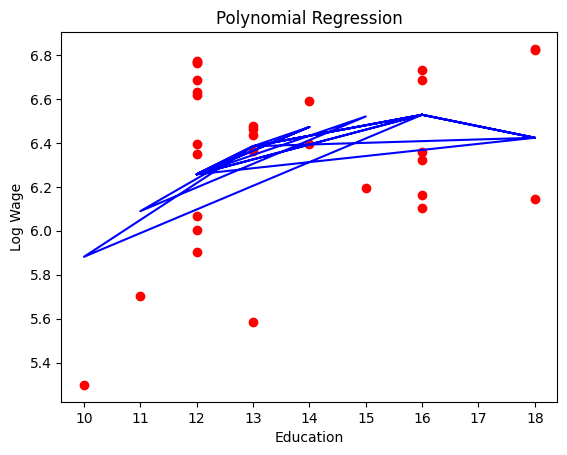

                                 OLS Regression Results                                
Dep. Variable:                  lwage   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              1252.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):                    2.07e-25
Time:                        14:51:13   Log-Likelihood:                         -41.272
No. Observations:                  30   AIC:                                      84.54
Df Residuals:                      29   BIC:                                      85.95
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# extract the independent and dependent variables from the data
X = yourdata['educ'].values.reshape(-1, 1)
y = yourdata['lwage']

# fit a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# visualize the model
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(poly.fit_transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Education')
plt.ylabel('Log Wage')
plt.show()
# Tạo mô hình hồi quy tuyến tính và fit dữ liệu vào mô hình
model = sm.OLS(y, X).fit()

# In kết quả
print(model.summary())

Using wage as the dependent variable and education as the independent variable, the first model is a straightforward linear regression model. A polynomial regression model with a quadratic component for education makes up the second model.

When comparing the two models, the first one has a lower AIC of 36.00 and a higher R-squared value of 0.070, indicating that it has a better fit and explains more variation in the data than the second model. Also, the first model's coefficient of education has a p-value of 0.158, indicating that at the 5% level, the relationship between education and log salary is not statistically significant.
The second model, in comparison, has a very high R-squared value of 0.967, indicating that it effectively accounts for virtually all of the variation in the data. The second model, however, has a high AIC of 97.02, indicating that its fit is not as excellent as the first model's. The quadratic term of educ is the sole coefficient in the second model, which also contains one. Because of this, it is challenging to meaningfully interpret the relationship between education and log salary.

Therefore, the first model is likely better because it is simpler, more interpretable, and has a better fit to the data. The second model may be overfitting the data, which can lead to poor performance on new data.